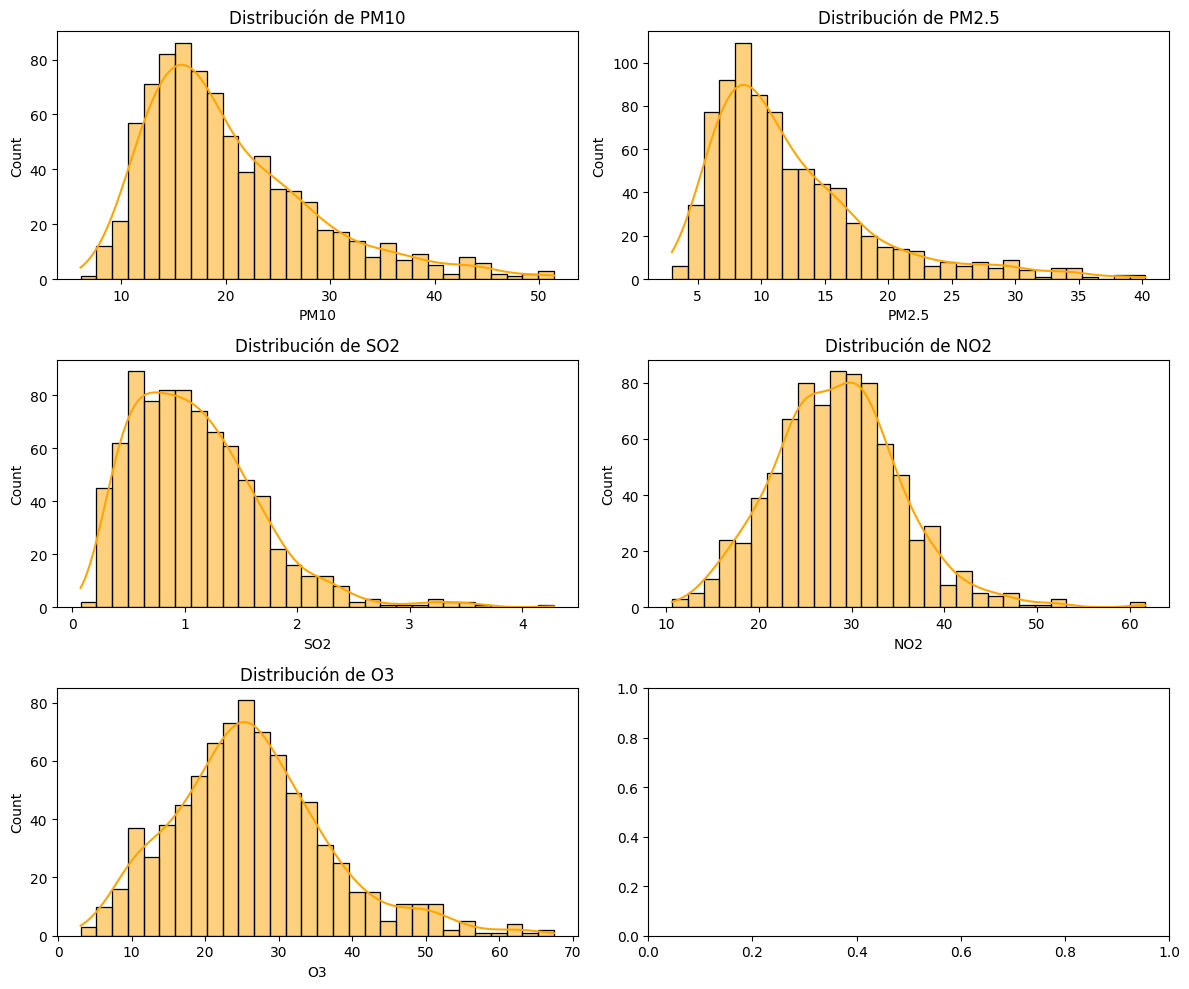

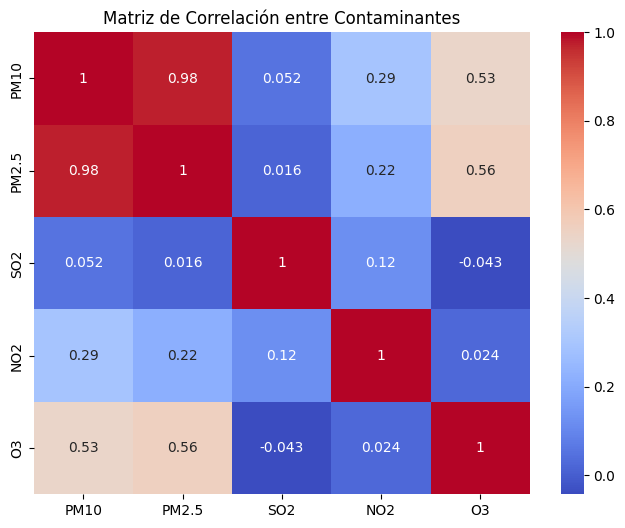

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los CSV desde la línea real
pm10 = pd.read_csv("PM10_CLUB_UNION.csv", sep=";", skiprows=8)[['Fecha inicial', 'PM10']].rename(columns={'Fecha inicial': 'Fecha'})
pm25 = pd.read_csv("PM2.5_CLUB_UNION.csv", sep=";", skiprows=8)[['Fecha inicial', 'PM2.5']].rename(columns={'Fecha inicial': 'Fecha'})
so2 = pd.read_csv("SO2_CLUB_UNION.csv", sep=";", skiprows=8)[['Fecha inicial', 'SO2']].rename(columns={'Fecha inicial': 'Fecha'})
no2 = pd.read_csv("NO2_CLUB_UNION.csv", sep=";", skiprows=8)[['Fecha inicial', 'NO2']].rename(columns={'Fecha inicial': 'Fecha'})
o3  = pd.read_csv("O3_CLUB_UNION.csv",  sep=";", skiprows=8)[['Fecha inicial', 'O3']].rename(columns={'Fecha inicial': 'Fecha'})

# Unificar
df = pm10.merge(pm25, on="Fecha").merge(so2, on="Fecha").merge(no2, on="Fecha").merge(o3, on="Fecha")

# Limpieza de datos
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df = df.dropna()
df = df.sort_values(by='Fecha')

# Feature Engineering: crear variable ICA
def clasificar_ica(valor):
    if valor <= 50:
        return "Buena"
    elif valor <= 100:
        return "Moderada"
    else:
        return "Mala"

df['ICA_categoria'] = df['PM10'].apply(clasificar_ica)

# Análisis exploratorio
columnas = ['PM10', 'PM2.5', 'SO2', 'NO2', 'O3']
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.ravel()

for i, col in enumerate(columnas):
    sns.histplot(df[col], bins=30, kde=True, ax=axs[i], color='orange')
    axs[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[columnas].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación entre Contaminantes")
plt.show()


Como parte del análisis exploratorio, se generaron histogramas para visualizar la distribución de los cinco contaminantes analizados (PM10, PM2.5, SO2, NO2 y O3).
Esto permite detectar tendencias, valores atípicos y rangos de concentración más frecuentes.

También se construyó una matriz de correlación, que evidencia una fuerte relación positiva entre PM10 y PM2.5 (correlación de 0.98), lo cual es consistente con la literatura, ya que ambos provienen de fuentes similares.
Otros contaminantes como SO2 y NO2 tienen menor correlación, lo que indica un comportamiento independiente.